# Example of using python to calculate dissolved oxygen along a river reach downstream of a pollutant discharge
Press shift-enter to "run" each cell.

# The Streeter-Phelps Equation / DO Sag Curve
$D = \frac{k_1 L_a}{k_2 - k_1} (\exp^{-k_1 t} - \exp^{-k_2 t}) + D_a \exp^{-k_2 t}$

Where:
$D$ is the saturation deficit (mg/l)  
$k_1$ is the deoxygenation rate (day-1)  
$k_2$ is the reaeration rate (day-1)    
$L_a$ is the initial oxygen demand of organic matter in the water, or ultimate BOD (mg/l)   
and $D_a$ is the initial oxygen deficit (mg/l)  



In [39]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Qs = 0.4 #m3/s discharge in the stream
v = 0.5 #m/s velocity of the stream
T = 20 #ºC water temperature of the stream

Qe = 0.2 #m3/s
BODl = 25 #mg/l

k1 = 0.34 #day-1 deoxygenation
k2 = 0.65 #day-1 reaeration

Ss = 0.0035*T**2 - 0.337*T + 14.395 #Saturation concentration (function of temperature in ºC)
Ss = 9.17
print('The saturation concentration (O2) is %0.2f mg/l' % Ss)
Oi = Qs / (Qs + Qe) * Ss
Di = Ss-Oi
print('The inicial oxygen concentration (Oi) is %0.2f mg/l' % Oi)
print('The initial saturation deficit (Di) is %0.2f mg/l' % Di)
BODli = Qe / (Qs + Qe) * BODl
print('BODu is %0.2f mg/l' % BODli)
BOD5i = BODli * (1-math.exp(-5*k1))
print('BOD5 is %0.2f mg/l' % BOD5i)


The saturation concentration (O2) is 9.17 mg/l
The inicial oxygen concentration (Oi) is 6.11 mg/l
The initial saturation deficit (Di) is 3.06 mg/l
BODu is 8.33 mg/l
BOD5 is 6.81 mg/l


In [40]:


def streeterPhelps(k1, k2, Di, BODli, t):
    '''
    YOUR CODE HERE
    '''
    
    D = k1*BODli/(k2-k1)*(math.exp(-k1*t)-math.exp(-k2*t))+Di*math.exp(-k2*t)
       
    return D

             oxygen deficit  dissolved oxygen
time [days]                                  
0.00000            3.056667          6.113333
0.10101            3.134671          6.035329
0.20202            3.198528          5.971472
0.30303            3.249446          5.920554
0.40404            3.288546          5.881454
...                     ...               ...
9.59596            0.338049          8.831951
9.69697            0.326991          8.843009
9.79798            0.316283          8.853717
9.89899            0.305916          8.864084
10.00000           0.295879          8.874121

[100 rows x 2 columns]
               oxygen deficit  dissolved oxygen
Distance [km]                                  
0.000000             3.056667          6.113333
4.363636             3.134671          6.035329
8.727273             3.198528          5.971472
13.090909            3.249446          5.920554
17.454545            3.288546          5.881454
...                       ...             

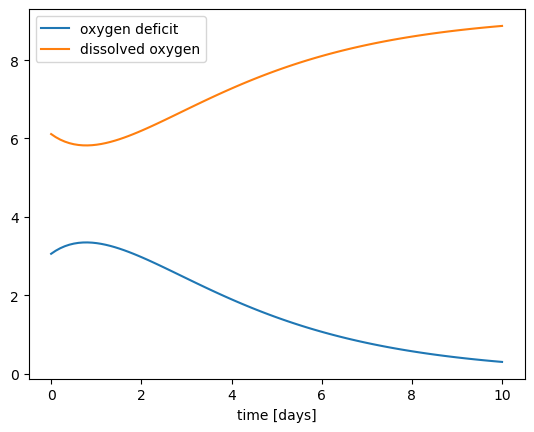

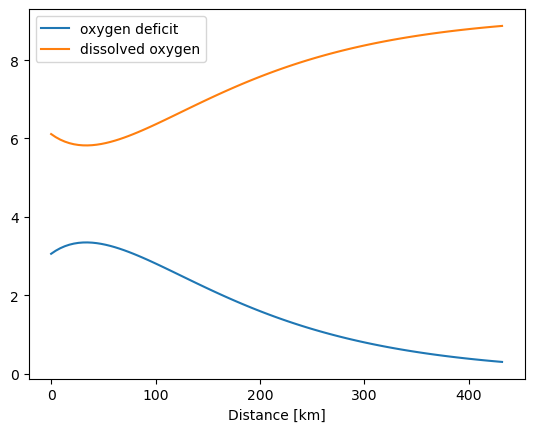

In [41]:



time = np.linspace(0, 10, 100)
results = pd.DataFrame({'oxygen deficit': time*np.nan}, index=time)
results.index.name = 'time [days]'

for i0, t0 in enumerate(results.index):
    results.loc[t0, 'oxygen deficit'] = streeterPhelps(k1, k2, Di, BODli, t0)

results['dissolved oxygen'] = Ss - results['oxygen deficit']        
ax = results.plot()
print(results)

results_distance = results.copy()
results_distance.index = results.index*v*86.400
results_distance.index.name = 'Distance [km]'

results_distance.plot()
print(results_distance)

In [42]:
results.min()

oxygen deficit      0.295879
dissolved oxygen    5.823513
dtype: float64